In [2]:
words = open('names.txt').read().splitlines()
words

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn',
 'abigail',
 'emily',
 'elizabeth',
 'mila',
 'ella',
 'avery',
 'sofia',
 'camila',
 'aria',
 'scarlett',
 'victoria',
 'madison',
 'luna',
 'grace',
 'chloe',
 'penelope',
 'layla',
 'riley',
 'zoey',
 'nora',
 'lily',
 'eleanor',
 'hannah',
 'lillian',
 'addison',
 'aubrey',
 'ellie',
 'stella',
 'natalie',
 'zoe',
 'leah',
 'hazel',
 'violet',
 'aurora',
 'savannah',
 'audrey',
 'brooklyn',
 'bella',
 'claire',
 'skylar',
 'lucy',
 'paisley',
 'everly',
 'anna',
 'caroline',
 'nova',
 'genesis',
 'emilia',
 'kennedy',
 'samantha',
 'maya',
 'willow',
 'kinsley',
 'naomi',
 'aaliyah',
 'elena',
 'sarah',
 'ariana',
 'allison',
 'gabriella',
 'alice',
 'madelyn',
 'cora',
 'ruby',
 'eva',
 'serenity',
 'autumn',
 'adeline',
 'hailey',
 'gianna',
 'valentina',
 'isla',
 'eliana',
 'quinn',
 'nevaeh',
 'ivy',
 'sadie',
 'piper',
 'lydia',
 'alexa',
 'josephine',
 'emery',
 'julia'

In [19]:
#Let's create bigrams
b = {}
for w in words:
    nw = ['.'] + list(w) + ['.']
    for ch1, ch2, ch3 in zip(nw, nw[1:], nw[2:]):
        bigram = ch1 + ch2
        trigram = (bigram, ch3)
        b[trigram] = b.get(trigram, 0) + 1

uniq = set()

for x, y in b.keys():
    uniq.add(x)

unique = sorted(list(uniq))
print(unique)


#Itos
alphas = sorted(list(set(''.join(words))))
itos = {i+1:s for i,s in enumerate(alphas)}
itos[0] = '.'
# itos

['.a', '.b', '.c', '.d', '.e', '.f', '.g', '.h', '.i', '.j', '.k', '.l', '.m', '.n', '.o', '.p', '.q', '.r', '.s', '.t', '.u', '.v', '.w', '.x', '.y', '.z', 'aa', 'ab', 'ac', 'ad', 'ae', 'af', 'ag', 'ah', 'ai', 'aj', 'ak', 'al', 'am', 'an', 'ao', 'ap', 'aq', 'ar', 'as', 'at', 'au', 'av', 'aw', 'ax', 'ay', 'az', 'ba', 'bb', 'bc', 'bd', 'be', 'bh', 'bi', 'bj', 'bl', 'bn', 'bo', 'br', 'bs', 'bt', 'bu', 'by', 'ca', 'cc', 'cd', 'ce', 'cg', 'ch', 'ci', 'cj', 'ck', 'cl', 'co', 'cp', 'cq', 'cr', 'cs', 'ct', 'cu', 'cx', 'cy', 'cz', 'da', 'db', 'dc', 'dd', 'de', 'df', 'dg', 'dh', 'di', 'dj', 'dk', 'dl', 'dm', 'dn', 'do', 'dq', 'dr', 'ds', 'dt', 'du', 'dv', 'dw', 'dy', 'dz', 'ea', 'eb', 'ec', 'ed', 'ee', 'ef', 'eg', 'eh', 'ei', 'ej', 'ek', 'el', 'em', 'en', 'eo', 'ep', 'eq', 'er', 'es', 'et', 'eu', 'ev', 'ew', 'ex', 'ey', 'ez', 'fa', 'fe', 'ff', 'fg', 'fh', 'fi', 'fk', 'fl', 'fn', 'fo', 'fr', 'fs', 'ft', 'fu', 'fw', 'fy', 'fz', 'ga', 'gb', 'gd', 'ge', 'gf', 'gg', 'gh', 'gi', 'gj', 'gl', 'gm', 'gn

In [10]:
import torch
N = torch.zeros((27, len(uniq)), dtype=torch.int32)
N

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.int32)

In [11]:
#Map the entries to the count of the number of alphabets that follow a pair of letters
for i,l in enumerate(unique):
    for j,s in itos.items():
        N[j,i] = b.get((l, s), 0)

N[:, :12]

tensor([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
        [ 207,  169,  628,  700,   23,  158,  136,  505,    9, 1255, 1254,  463],
        [ 190,    0,    0,    0,   15,    0,    0,    0,   12,    1,    0,    0],
        [  31,    0,    0,    0,    4,    0,    0,    0,    6,    3,    2,    0],
        [ 366,    0,    0,    0,   80,    0,    0,    0,   21,    2,    2,    0],
        [  55,  253,   65,  524,    9,   49,  110,  151,    1,  403,  601,  366],
        [  21,    0,    0,    0,   10,    1,    0,    0,   10,    0,    0,    0],
        [  17,    0,    0,    0,    6,    0,    0,    0,    4,    0,    0,    0],
        [  91,    9,  352,   32,    9,    0,   10,    0,    5,   41,  240,    0],
        [ 154,   41,   44,  130,   54,   71,  128,   55,    1,   73,  250,  269],
        [  27,    1,    2,    6,    3,    0,    0,    0,    0,    1,    2,    1],
        [  75,    0,    0,    2,    8,    0,    0,    0,   17,    1,    0,    0],
        [ 632,  

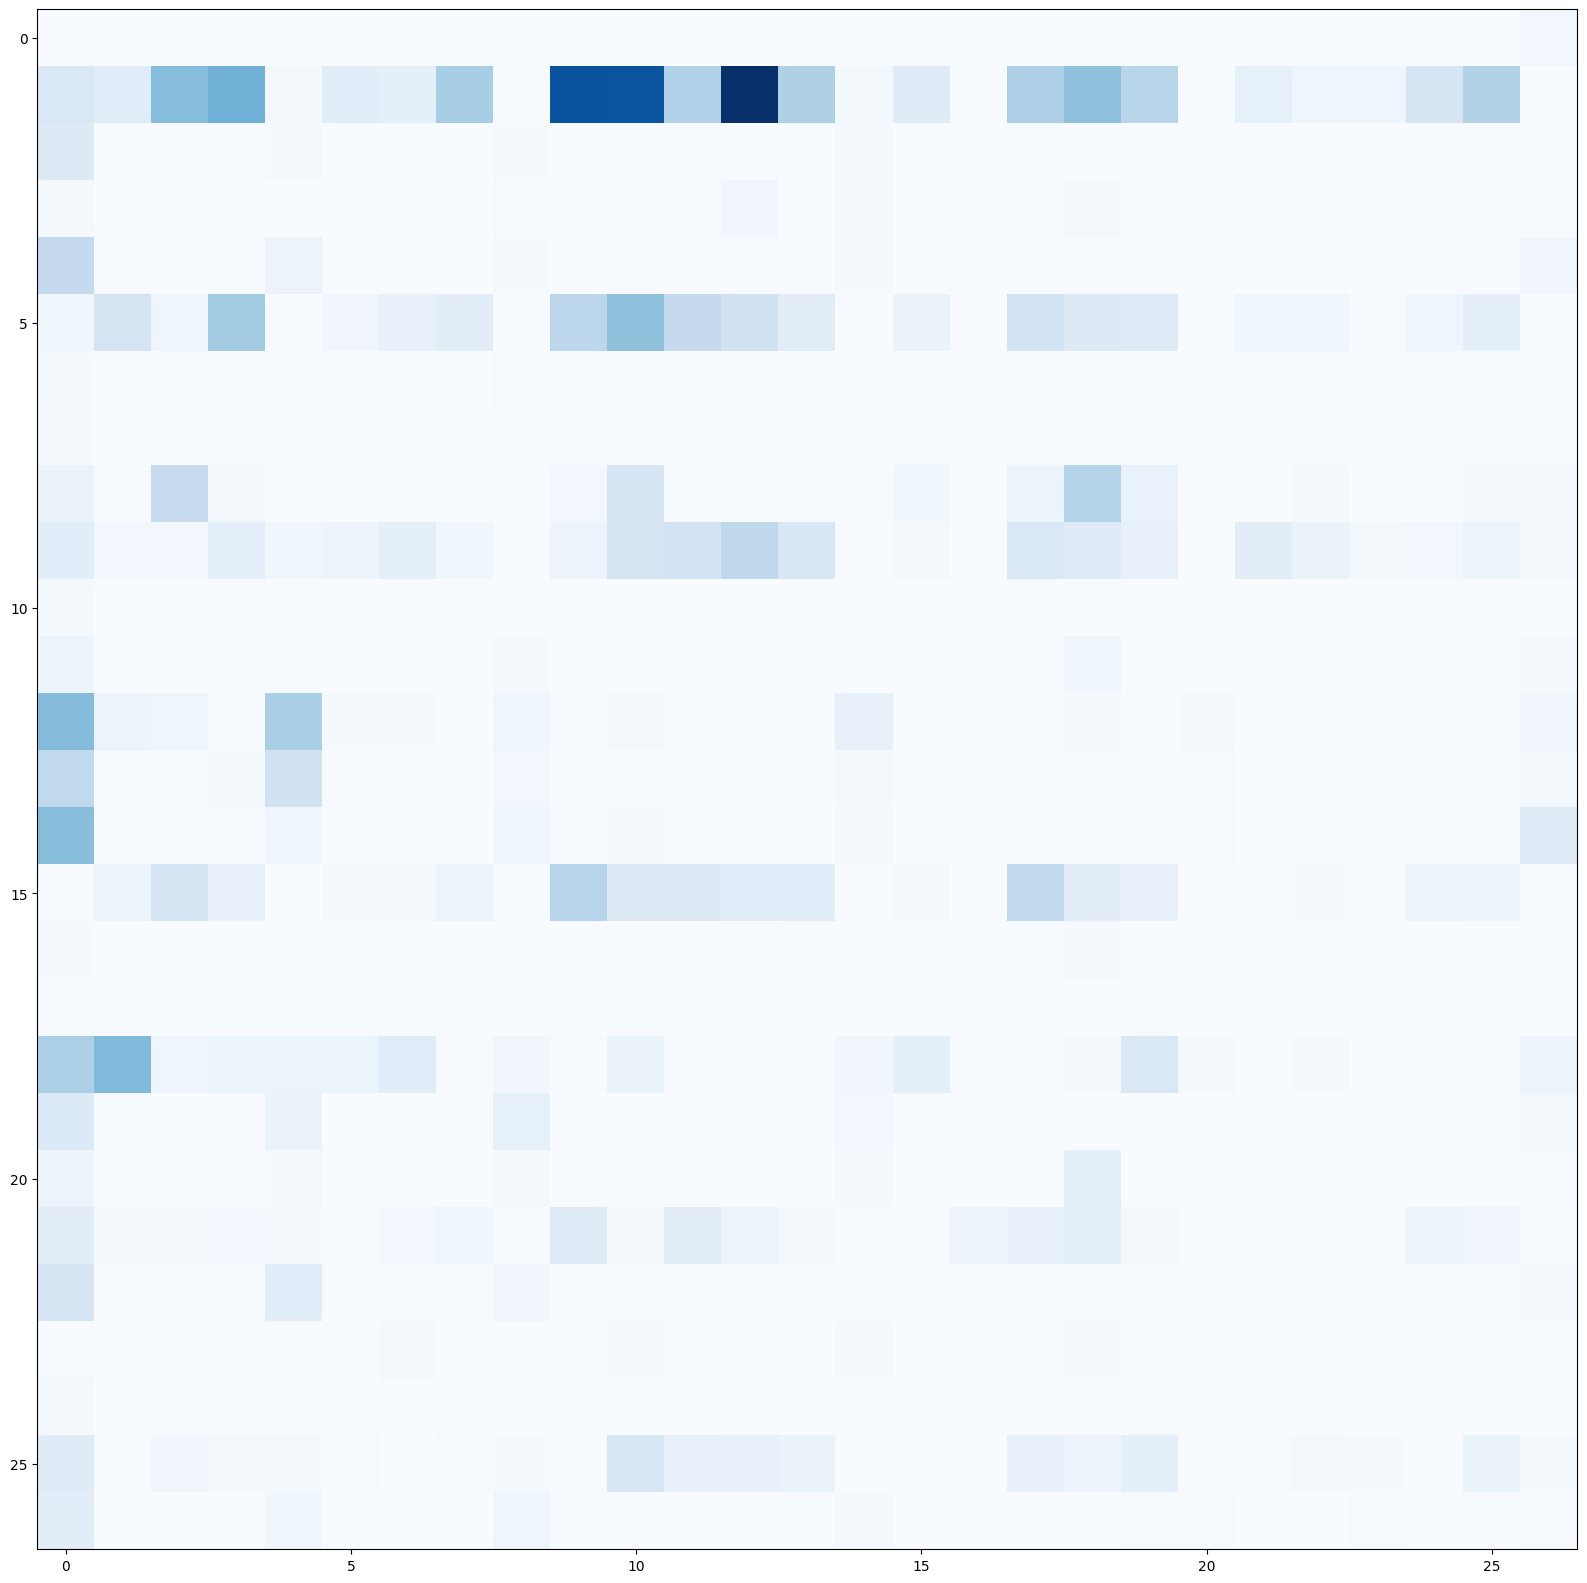

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.imshow(N[:, :27], cmap='Blues')

In [15]:
P = N[1].float()
print(P/P.sum())

tensor([7.0229e-03, 5.7337e-03, 2.1306e-02, 2.3749e-02, 7.8032e-04, 5.3605e-03,
        4.6141e-03, 1.7133e-02, 3.0534e-04, 4.2578e-02, 4.2545e-02, 1.5708e-02,
        4.9296e-02, 1.5946e-02, 8.8210e-04, 5.9372e-03, 1.6964e-04, 1.6014e-02,
        2.0187e-02, 1.4385e-02, 0.0000e+00, 4.1052e-03, 2.3070e-03, 1.9338e-03,
        8.3461e-03, 1.5471e-02, 0.0000e+00, 9.4996e-04, 1.2892e-03, 5.5640e-03,
        3.0534e-04, 9.8388e-04, 1.4249e-03, 3.7659e-03, 3.5623e-03, 1.7642e-03,
        4.1052e-03, 1.1976e-02, 1.4623e-02, 2.7277e-02, 0.0000e+00, 2.0356e-04,
        0.0000e+00, 1.2587e-02, 2.0356e-03, 3.7659e-03, 0.0000e+00, 5.4623e-03,
        9.8388e-04, 1.6964e-04, 1.3198e-02, 4.1730e-03, 1.6964e-04, 2.7142e-04,
        0.0000e+00, 1.0178e-04, 7.8032e-04, 5.4283e-04, 8.1425e-04, 0.0000e+00,
        1.8321e-03, 3.3927e-05, 3.3927e-05, 6.8872e-03, 6.7854e-05, 0.0000e+00,
        0.0000e+00, 1.3571e-04, 3.3927e-05, 6.1069e-04, 0.0000e+00, 4.0712e-04,
        0.0000e+00, 8.0068e-03, 2.4088e-

In [20]:
inx = 0
g = torch.Generator().manual_seed(2147483647)

for i in range(10):
    out = []
    while True:
        p = N[inx].float()
        p /= sum(p)
        # print(p)
        inx = torch.multinomial(p, num_samples = 1, replacement=True, generator = g).item()
        print(inx)
        out.append(unique[inx])
        if inx == 0:
            break
    print(''.join(out))

318


IndexError: index 318 is out of bounds for dimension 0 with size 27